In [2]:
#!/usr/bin/env python
#-*- coding: utf-8 -*-
# refer to https://github.com/Tacsy/ACSESS/blob/master/molproperty.py

import numpy as np

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.six.moves import cPickle
from rdkit.six import iteritems


import math
from collections import defaultdict

import os

In [175]:
atomic_prop = '''atomic_number	name	symbol	period	atomic_mass	density	melting_point	boiling_point	atomic_radius	atomic_volume	covalent_radius	covalent_volume	van_der_waals_radius	van_der_waals_volume
1	Hydrogen	H	1	1.00794	0.0708	14.01	20.28	0.79	14.1	0.32	0.137258277	1.1	5.575279763
2	Helium	He	1	4.002602	0.147	0.95	4.216	0.49	31.8	0.93	3.369282723	1.4	11.49404032
3	Lithium	Li	2	6.941	0.534	553.69	1118.15	2.05	13.1	1.23	7.794781462	1.82	25.25240659
4	Beryllium	Be	2	9.01218	1.848	1551	3243	1.4	5	0.9	3.053628059	1.53	15.00247466
5	Boron	B	2	10.811	2.34	2573	3931	1.17	4.6	0.82	2.309564878	1.92	29.64778792
6	Carbon	C	2	12.011	2.25	3820	5100	0.91	5.3	0.77	1.912320959	1.7	20.57952628
7	Nitrogen	N	2	14.00674	0.808	63.29	77.4	0.75	17.3	0.75	1.767145868	1.55	15.59853112
8	Oxygen	O	2	15.9994	1.149	54.8	90.19	0.65	14	0.73	1.629510599	1.52	14.71022695
9	Fluorine	F	2	18.998403	1.108	53.53	85.01	0.57	17.1	0.72	1.563457566	1.47	13.30578843
10	Neon	Ne	2	20.1797	1.204	48	27.1	0.51	16.8	0.71	1.499214091	1.54	15.29856767
11	Sodium	Na	3	22.989768	0.971	370.96	1156.1	2.23	23.7	1.54	15.29856767	2.27	48.99662669
12	Magnesium	Mg	3	24.305	1.738	922	1363	1.72	14	1.36	10.53671745	1.73	21.68837025
13	Aluminum	Al	3	26.981539	2.6989	933.5	2740	1.62	10	1.18	6.882316348	1.84	26.09408534
14	Silicon	Si	3	28.0855	2.33	1683	2628	1.44	12.1	1.11	5.728719337	2.1	38.79238609
15	Phosphorus	P	3	30.973762	1.82	317.3	553	1.23	17	1.06	4.988916155	1.8	24.42902447
16	Sulfur	S	3	32.066	2.07	386	717.824	1.09	15.5	1.02	4.445177676	1.8	24.42902447
17	Chlorine	Cl	3	35.4527	1.56	172.2	238.6	0.97	18.7	0.99	4.064378947	1.75	22.4492975
18	Argon	Ar	3	39.948	1.4	83.8	87.3	0.88	24.2	0.98	3.94245583	1.88	27.83313699
19	Potassium	K	4	39.0983	0.856	336.8	1047	2.77	45.3	2.03	35.04101868	2.75	87.11374629
20	Calcium	Ca	4	40.078	1.55	1112	1757	2.23	29.9	1.74	22.06664733	2.31	51.63266588
21	Scandium	Sc	4	44.95591	2.99	1814	3104	2.09	15	1.44	12.50766053	2.15	41.62976785
22	Titanium	Ti	4	47.88	4.54	1933	3560	2	10.6	1.32	9.63408343	2.11	39.34920616
23	Vanadium	V	4	50.9415	6.11	2160	3650	1.92	8.35	1.22	7.606206316	2.07	37.1534926
24	Chromium	Cr	4	51.9961	7.18	2130	2945	1.85	7.23	1.18	6.882316348	2.06	36.61763323
25	Manganese	Mn	4	54.93805	7.21	1517	2235	1.79	7.39	1.17	6.708820846	2.05	36.08695121
26	Iron	Fe	4	55.847	7.874	1808	3023	1.72	7.1	1.17	6.708820846	2.04	35.56142141
27	Cobalt	Co	4	58.9332	8.9	1768	3143	1.67	6.7	1.16	6.538265875	2	33.51032164
28	Nickel	Ni	4	58.6934	8.902	1726	3005	1.62	6.6	1.15	6.370626303	1.97	32.02486353
29	Copper	Cu	4	63.546	8.96	1356.6	2840	1.57	7.1	1.17	6.708820846	1.96	31.53964664
30	Zinc	Zn	4	65.39	7.133	692.73	1180	1.53	9.2	1.25	8.181230869	2.01	34.01549393
31	Gallium	Ga	4	69.723	5.91	302.93	2676	1.81	11.8	1.26	8.379155395	1.87	27.39134947
32	Germanium	Ge	4	72.61	5.323	1210.6	3103	1.52	13.6	1.22	7.606206316	2.11	39.34920616
33	Arsenic	As	4	74.92159	5.73	1090	876	1.33	13.1	1.2	7.238229474	1.85	26.52184878
34	Selenium	Se	4	78.96	4.79	490	958.1	1.22	16.5	1.16	6.538265875	1.9	28.73091201
35	Bromine	Br	4	79.904	3.12	265.9	331.9	1.12	23.5	1.14	6.205876995	1.85	26.52184878
36	Krypton	Kr	4	83.8	2.155	116.6	120.85	1.03	32.2	1.89	28.27964946	2.02	34.52571789
37	Rubidium	Rb	5	85.4678	1.532	312.2	961	2.98	55.9	2.16	42.21335429	3.03	116.5242979
38	Strontium	Sr	5	87.62	2.54	1042	1657	2.45	33.7	1.91	29.18694979	2.49	64.66758619
39	Yttrium	Y	5	88.90585	4.47	1795	3611	2.27	19.8	1.62	17.80875884	2.32	52.306127
40	Zirconium	Zr	5	91.224	6.506	2125	4650	2.16	14.1	1.45	12.77005054	2.23	46.45186962
41	Niobium	Nb	5	92.90638	8.57	2741	5015	2.08	10.8	1.34	10.07866487	2.18	43.39683832
42	Molybdenum	Mo	5	95.94	10.22	2890	4885	2.01	9.4	1.3	9.20277208	2.17	42.8023694
43	Technetium	Tc	5	97.9072	11.5	2445	5150	1.95	8.5	1.27	8.580246646	2.16	42.21335429
44	Ruthenium	Ru	5	101.07	12.41	2583	4173	1.89	8.3	1.25	8.181230869	2.13	40.47878046
45	Rhodium	Rh	5	102.9055	12.41	2239	4000	1.83	8.3	1.25	8.181230869	2.1	38.79238609
46	Palladium	Pd	5	106.42	12.02	1825	3413	1.79	8.9	1.28	8.784529756	2.1	38.79238609
47	Silver	Ag	5	107.8682	10.5	1235.1	2485	1.75	10.3	1.34	10.07866487	2.11	39.34920616
48	Cadmium	Cd	5	112.411	8.65	594.1	1038	1.71	13.1	1.41	11.74210467	2.18	43.39683832
49	Indium	In	5	114.818	7.31	429.32	2353	2	15.7	1.44	12.50766053	1.93	30.11345154
50	Tin	Sn	5	118.71	7.31	505.1	2543	1.72	16.3	1.41	11.74210467	2.17	42.8023694
51	Antimony	Sb	5	121.76	6.691	903.9	1908	1.53	18.4	1.4	11.49404032	2.06	36.61763323
52	Tellurium	Te	5	127.6	6.24	722.7	1263	1.42	20.5	1.36	10.53671745	2.06	36.61763323
53	Iodine	I	5	126.90447	4.93	386.7	457.5	1.32	25.7	1.33	9.854702821	1.98	32.51503158
54	Xenon	Xe	5	131.29	3.52	161.3	166.1	1.24	42.9	1.31	9.41678156	2.16	42.21335429
55	Cesium	Cs	6	132.90543	1.873	301.6	951.6	3.34	70	2.35	54.36159568	3.43	169.0327937
56	Barium	Ba	6	137.327	3.5	1002	1910	2.76	39	1.98	32.51503158	2.68	80.62931894
57	Lanthanum	La	6	138.9055	6.15	1194	3730	2.74	22.5	1.25	8.181230869	2.43	60.10456109
58	Cerium	Ce	6	140.115	6.757	1072	3699	2.7	21	1.65	18.8165692	2.42	59.36557891
59	Praseodymium	Pr	6	140.90765	6.773	1204	3785	2.67	20.8	1.65	18.8165692	2.4	57.90583579
60	Neodymium	Nd	6	144.24	7.007	1294	3341	2.64	20.6	1.64	18.47651902	2.39	57.18502458
61	Promethium	Pm	6	144.9127	7.2	1441	3000	2.62		1.63	18.14059061	2.38	56.4702201
62	Samarium	Sm	6	150.36	7.52	1350	2064	2.59	19.9	1.62	17.80875884	2.36	55.05853078
63	Europium	Eu	6	151.965	5.243	1095	1870	2.56	28.9	1.85	26.52184878	2.35	54.36159568
64	Gadolinium	Gd	6	157.25	7.9	1586	3539	2.54	19.9	1.61	17.48099857	2.34	53.67056677
65	Terbium	Tb	6	158.92534	8.229	1629	3296	2.51	19.2	1.59	16.83759202	2.33	52.98541892
66	Dysprosium	Dy	6	162.5	8.55	1685	2835	2.49	19	1.59	16.83759202	2.31	51.63266588
67	Holmium	Ho	6	164.93032	8.795	1747	2968	2.47	18.7	1.58	16.52189547	2.3	50.96501042
68	Erbium	Er	6	167.26	9.06	1802	3136	2.45	18.4	1.57	16.21016989	2.29	50.30313549
69	Thulium	Tm	6	168.93421	9.321	1818	2220	2.42	18.1	1.56	15.90239015	2.27	48.99662669
70	Ytterbium	Yb	6	173.04	6.9654	1097	1466	2.4	24.8	1.7	20.57952628	2.26	48.35194256
71	Lutetium	Lu	6	174.967	9.8404	1936	3668	2.25	17.8	1.56	15.90239015	2.24	47.07958916
72	Hafnium	Hf	6	178.49	13.31	2503	5470	2.16	13.6	1.44	12.50766053	2.23	46.45186962
73	Tantalum	Ta	6	180.9479	16.654	3269	5698	2.09	10.9	1.34	10.07866487	2.22	45.82975469
74	Tungsten	W	6	183.84	19.3	3680	5930	2.02	9.53	1.3	9.20277208	2.18	43.39683832
75	Rhenium	Re	6	186.207	21.02	3453	5900	1.97	8.85	1.28	8.784529756	2.16	42.21335429
76	Osmium	Os	6	190.23	22.57	3327	5300	1.92	8.43	1.26	8.379155395	2.16	42.21335429
77	Iridium	Ir	6	192.22	22.42	2683	4403	1.87	8.54	1.27	8.580246646	2.13	40.47878046
78	Platinum	Pt	6	195.08	21.45	2045	4100	1.83	9.1	1.3	9.20277208	2.13	40.47878046
79	Gold	Au	6	196.96654	19.3	1337.58	3080	1.79	10.2	1.34	10.07866487	2.14	41.05158495
80	Mercury	Hg	6	200.59	13.546	234.28	629.73	1.76	14.8	1.49	13.85630437	2.23	46.45186962
81	Thallium	Tl	6	204.3833	11.85	576.6	1730	2.08	17.2	1.48	13.57918658	1.96	31.53964664
82	Lead	Pb	6	207.2	11.35	600.65	2013	1.81	18.3	1.47	13.30578843	2.02	34.52571789
83	Bismuth	Bi	6	208.98037	9.747	544.5	1883	1.63	21.3	1.46	13.03608479	2.07	37.1534926
84	Polonium	Po	6	208.9824	9.32	527	1235	1.53	22.7	1.53	15.00247466	1.97	32.02486353'''
import pandas as pd
data = [i.split('\t') for i in atomic_prop.split('\n')]
df = pd.DataFrame(data[1:], columns = data[0]).set_index('atomic_number')
df.index = df.index.astype(int)
covalent_radius = df.covalent_radius.astype(float).to_dict()

In [228]:
############################################################
# Assign polarizabilities to every atom.
# Units are Angstrom^3/2. We assume all valences are filled.
#
# This will work without explicit hydrogens, but it will
# obviously not assign properties to implicit hydrogens.
#
# Values are from Table I of
# Miller and Savchik, JACS 101(24) 7206-7213, 1979.
# dx.doi.org/10.1021/ja00518a014
############################################################
def AssignAtomicPolarizability(mol):

    for atom in mol.GetAtoms():
        #get degree for specific molecule
        nBonds = atom.GetTotalDegree()

        #Hydrogen (H)
        if atom.GetAtomicNum() == 1:
            atom.SetDoubleProp('polarizability', 0.314)

        #Carbon (C)
        elif atom.GetAtomicNum() == 6:
            if nBonds == 4:
                atom.SetDoubleProp('polarizability', 1.294)
            elif nBonds == 2:
                atom.SetDoubleProp('polarizability', 1.393)
            elif nBonds == 3:
                if atom.GetNumExplicitHs() + atom.GetNumImplicitHs() > 0:
                    atom.SetDoubleProp('polarizability', 1.428)
                else:
                    '''
                    in this part I employ a different logic than that in
                    previous version of ACSESS and may be consult with Aaron for
                    further details
                    '''
                    cross = True
                    for nbor in atom.GetNeighbors():
                        if not nbor.GetIsAromatic():
                            cross = False
                            break
                    if cross:
                        atom.SetDoubleProp('polarizability', 1.800)
                    else:
                        atom.SetDoubleProp('polarizability', 1.428)

        #Nitrogen (N)
        elif atom.GetAtomicNum() == 7:
            if atom.GetIsAromatic():
                if nBonds == 2:
                    atom.SetDoubleProp('polarizability', 1.262)
                else:
                    atom.SetDoubleProp('polarizability', 1.220)
            else:
                if nBonds == 1:
                    atom.SetDoubleProp('polarizability', 1.304)
                else:
                    atom.SetDoubleProp('polarizability', 1.435)

        #Oxygen (O)
        elif atom.GetAtomicNum() == 8:
            if atom.GetIsAromatic():
                atom.SetDoubleProp('polarizability', 1.099)
            else:
                if nBonds == 1:
                    atom.SetDoubleProp('polarizability', 1.216)
                else:
                    atom.SetDoubleProp('polarizability', 1.290)

        #Sulfur (S)
        elif atom.GetAtomicNum() == 16:
            if atom.IsAromatic():
                atom.SetDoubleProp('polarizability', 2.982)
            elif nBonds == 2:
                atom.SetDoubleProp('polarizability', 3.496)
            else:
                atom.SetDoubleProp('polarizability', 3.967)

        #Halogens
        elif atom.GetAtomicNum() == 9:
            atom.SetDoubleProp('polarizability', 1.046)
        elif atom.GetAtomicNum() == 15:
            atom.SetDoubleProp('polarizability', 3.000)
        elif atom.GetAtomicNum() == 17:
            atom.SetDoubleProp('polarizability', 3.130)
        elif atom.GetAtomicNum() == 35:
            atom.SetDoubleProp('polarizability', 5.577)
        elif atom.GetAtomicNum() == 53:
            atom.SetDoubleProp('polarizability', 8.820)

#Iridium (I)
#This param value was obtained by fitting the above known tau values
#In general polarizability increases with atomic number so we used
#linear fit to get the value
#This is a crudest approx so could be wrong!
        elif atom.GetAtomicNum() == 77:
            atom.SetData('polarizability', 12.77)

        else:
            raise KeyError('No polarizabilities for atomic number' +
                           str(atom.GetAtomicNum()))


############################################################
# Topological steric effect index (TSEI)
# Cao and Liu, J Chem Inf Comput Sci 44(2), 678-687, 2004.
# dx.doi.org/10.1021/ci034266b


# Covalent radii (in angstroms)
# These are the 2008 values from CSD, except for carbon which is from Cao
#
# This returns numbers a little different than those returned by Marvin.
# If this is to be used for serious business, we should figure out why.
# First check would probably be covalent radius values
# Second would be path termination length
############################################################
def AssignTSEI(mol):
    # all mol parsed into this function should be hydrogen added

    # radius = {
    #     1: 0.315,
    #     5: 0.84,
    #     6: 0.772,
    #     7: 0.711,
    #     8: 0.662,
    #     9: 0.57,
    #     14: 1.11,
    #     15: 1.06,
    #     16: 1.05,
    #     17: 1.024,
    #     35: 1.14,
    #     53: 1.33,
    #     77: 1.42
    # }
    
    radius = covalent_radius
    
    nAtoms = mol.GetNumAtoms()
    '''
    this is a revision part of code that deviate from previous code in ACSESS,
    we should consult with Aaron for more detail
    '''

    #Need to get shortest path between each pair of atoms
    #this could be faster by following paths outward from each atom
    #if atom is hydrogen, the TSEI is set as 0.0 directly
    for i in range(nAtoms):
        iAtom = mol.GetAtomWithIdx(i)
        if iAtom.GetAtomicNum() == 1:
            iAtom.SetDoubleProp('TSEI', 0.0)
            continue

        for j in range(i + 1, nAtoms):
            jAtom = mol.GetAtomWithIdx(j)
            if jAtom.GetAtomicNum() == 1:
                continue
            else:
                #calculate shoretest path
                path = Chem.GetShortestPath(mol, i, j)
                length = 0.0
                for k in path:
                    kAtom = mol.GetAtomWithIdx(k)
                    if k == 0 or k == len(path) - 1:
                        length += radius[kAtom.GetAtomicNum()]
                    else:
                        length += 2.0 * radius[kAtom.GetAtomicNum()]

                #factor of 2 cancels length vs. radius
                iRad = radius[iAtom.GetAtomicNum()]
                jRad = radius[jAtom.GetAtomicNum()]
                if iAtom.HasProp('TSEI'):
                    iAtom.SetDoubleProp('TSEI',
                                        iAtom.GetDoubleProp('TSEI') +
                                        (2.0 * jRad / length)**3)
                else:
                    iAtom.SetDoubleProp('TSEI', (2.0 * jRad / length)**3)
                if jAtom.HasProp('TSEI'):
                    jAtom.SetDoubleProp('TSEI',
                                        jAtom.GetDoubleProp('TSEI') +
                                        (2.0 * iRad / length)**3)
                else:
                    jAtom.SetDoubleProp('TSEI', (2.0 * iRad / length)**3)



## Calculates hindrance of an atom from covalent radii values and distances

### http://infochim.u-strasbg.fr/cgi-bin/predserv-cgi/ChemAxon/JChem/marvin/help/developer/beans/api/index-all.html
### https://pubs-acs-org.libproxy1.nus.edu.sg/doi/full/10.1021/ci034266b

![位阻公式](https://pubs-acs-org.libproxy1.nus.edu.sg/cms/10.1021/ci034266b/asset/images/medium/ci034266be00002.gif)


In [235]:
def AssignSH(mol):
    '''
    ref: 
    '''
    
    # all mol parsed into this function should be hydrogen added
    radius = covalent_radius
    #covalent_radius

    dis = AllChem.Get3DDistanceMatrix(mol)

    nAtoms = mol.GetNumAtoms()
    '''
    this is a revision part of code that deviate from previous code in ACSESS,
    we should consult with Aaron for more detail
    '''

    #Need to get shortest path between each pair of atoms
    #this could be faster by following paths outward from each atom
    #if atom is hydrogen, the TSEI is set as 0.0 directly
    for i in range(nAtoms):
        iAtom = mol.GetAtomWithIdx(i)

        for j in range(i + 1, nAtoms):
            jAtom = mol.GetAtomWithIdx(j)

            #get the distance l
            length = dis[i, j]
            
            #calculate the R's
            iRad = radius[iAtom.GetAtomicNum()]
            jRad = radius[jAtom.GetAtomicNum()]
            if iAtom.HasProp('SH'):
                iAtom.SetDoubleProp('SH',
                                    iAtom.GetDoubleProp('SH') +
                                    (jRad / length)**2)
            else:
                iAtom.SetDoubleProp('SH', (jRad / length)**2)
            if jAtom.HasProp('SH'):
                jAtom.SetDoubleProp('SH',
                                    jAtom.GetDoubleProp('SH') +
                                    (iRad / length)**2)
            else:
                jAtom.SetDoubleProp('SH', (iRad / length)**2)


In [229]:
mol.GetAtomWithIdx(0)

In [242]:
#!pip install kora py3Dmol
import kora.install.rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

def show(smi, style='stick'):
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol, maxIters=100)
    mblock = Chem.MolToMolBlock(mol)

    view = py3Dmol.view(width=400, height=400)
    view.addModel(mblock, 'mol')
    view.setStyle({style:{}})
    view.zoomTo()
    view.show()
    
# example
smi = r"OC1C2CC3CC(C2)CC1C3"
show(smi) 

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

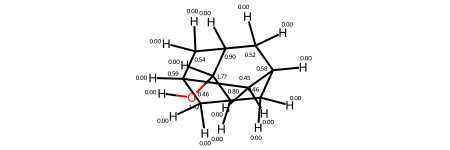

In [243]:
mol = Chem.MolFromSmiles(smi)
mol = Chem.AddHs(mol)
#AllChem.EmbedMolecule(mol)
#AllChem.MMFFOptimizeMolecule(mol, maxIters=100)

AssignTSEI(mol)

m2 = Chem.Mol(mol)
for at in m2.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("TSEI"))
    at.SetProp('atomNote',lbl)
m2


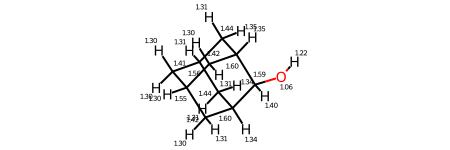

In [254]:
    
mol = Chem.MolFromSmiles(smi)
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol, randomSeed=1000)
AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
AssignSH(mol)

m2 = Chem.Mol(mol)
for at in m2.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("SH"))
    at.SetProp('atomNote',lbl)
m2

## 极性贡献

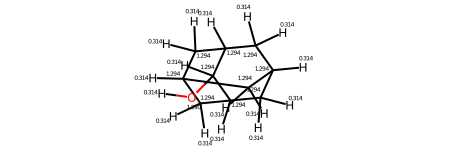

In [269]:
m2 = Chem.MolFromSmiles(smi)
m2 = Chem.AddHs(m2)

AssignAtomicPolarizability(m2)
for at in m2.GetAtoms():
    lbl = '%.3f'%(at.GetDoubleProp("polarizability"))
    at.SetProp('atomNote',lbl)
m2

In [256]:
def CalculateAPol(mol,includeImplicitHs=True):
    # apol values from https://github.com/cdk/cdk/blob/master/descriptor/qsarmolecular/src/main/java/org/openscience/cdk/qsar/descriptors/molecular/APolDescriptor.java
    # the original source cited in that code is no longer available and there is no other reference
    atomPols = [0, 0.666793, 0.204956, 24.3, 5.6, 3.03, 1.76, 1.1, 0.802, 0.557, 0.3956,
                    23.6, 10.6, 6.8, 5.38, 3.63, 2.9, 2.18, 1.6411, 43.4, 22.8, 17.8, 14.6, 12.4, 11.6, 9.4, 8.4, 7.5,
                    6.8, 6.1, 7.1, 8.12, 6.07, 4.31, 3.77, 3.05, 2.4844, 47.3, 27.6, 22.7, 17.9, 15.7, 12.8, 11.4, 9.6,
                    8.6, 4.8, 7.2, 7.2, 10.2, 7.7, 6.6, 5.5, 5.35, 4.044, 59.6, 39.7, 31.1, 29.6, 28.2, 31.4, 30.1,
                    28.8, 27.7, 23.5, 25.5, 24.5, 23.6, 22.7, 21.8, 21, 21.9, 16.2, 13.1, 11.1, 9.7, 8.5, 7.6, 6.5,
                    5.8, 5.7, 7.6, 6.8, 7.4, 6.8, 6, 5.3, 48.7, 38.3, 32.1, 32.1, 25.4, 27.4, 24.8, 24.5, 23.3, 23,
                    22.7, 20.5, 19.7, 23.8, 18.2, 17.5]
    contribs = []
    res = 0.0
    for atom in mol.GetAtoms():
        anum = atom.GetAtomicNum()
        if anum<=len(atomPols):
            apol = atomPols[anum]
            if includeImplicitHs:
                apol += atomPols[1] * atom.GetTotalNumHs(includeNeighbors=False)
            contribs.append(apol)
            res += apol
        else:
            raise ValueError(f"atomic number {anum} not found")
    return res,contribs

In [266]:
m = Chem.MolFromSmiles(smi)
#m = Chem.AddHs(m)

apol, contribs = CalculateAPol(m)
print(contribs)
print(apol)

[1.468793, 2.426793, 2.426793, 3.093586, 2.426793, 3.093586, 2.426793, 3.093586, 3.093586, 2.426793, 3.093586]
29.070688000000004


In [255]:
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
help(Descriptors.MolMR)

Help on function <lambda> in module rdkit.Chem.Crippen:

<lambda> lambda *x, **y
    Wildman-Crippen MR value
    
    Uses an atom-based scheme based on the values in the paper:
       S. A. Wildman and G. M. Crippen JCICS 39 868-873 (1999)
    
    **Arguments**
    
      - inMol: a molecule
    
      - addHs: (optional) toggles adding of Hs to the molecule for the calculation.
        If true, hydrogens will be added to the molecule and used in the calculation.



In [ ]:
mrContribs = rdMolDescriptors._CalcCrippenContribs(m)
apols = [y for x,y in mrContribs]
print(apols)

## 摩尔折射率MR贡献